In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
# data = pd.read('info.csv',sep=',',endoing='utf-8')
data = pd.read_csv('info.csv',sep=',',encoding='gbk',index_col=0)
# data = pd.read_csv('info.csv')

In [4]:
data.head()

,英雄名字,生存能力,攻击伤害,技能效果,上手难度,最大生命,最大法力,物理攻击,法术攻击,物理防御,...,攻速加成,暴击几率,暴击效果,物理吸血,法术吸血,冷却缩减,攻击范围,韧性,生命回复,法力回复
序号,,,,,,,,,,,,,,,,,,,,,
0,云缨,10,7,8,8,3237,430,175,0.0,101,...,0,0,200%%,0,0,0%,近程,0,49,15
1,司空震,6,7,4,5,3300,100,171,0.0,85,...,0,0,200%,0,0,0%,近程,0,50,0
2,澜,2,7,4,7,3300,440,167,0.0,90,...,0,0,200%,0,0,0%,近程,0,51,16
3,夏洛特,6,7,5,8,3303,0,150,0.0,101,...,0,0,200%,0,0,0%,近程,0,50,0
4,阿古朵,8,4,5,4,946,0,166,0.0,107,...,0,0,200%,0,0,0%,近程,0,50,0


In [5]:
data.shape

(106, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   英雄名字    106 non-null    object 
 1   生存能力    106 non-null    int64  
 2   攻击伤害    106 non-null    int64  
 3   技能效果    106 non-null    int64  
 4   上手难度    106 non-null    int64  
 5   最大生命    106 non-null    int64  
 6   最大法力    106 non-null    int64  
 7   物理攻击    106 non-null    int64  
 8   法术攻击    105 non-null    float64
 9   物理防御    106 non-null    int64  
 10  物理减伤率   106 non-null    object 
 11  法术防御    106 non-null    int64  
 12  法术减伤率   106 non-null    object 
 13  移速      106 non-null    int64  
 14  物理护甲穿透  102 non-null    object 
 15  法术护甲穿透  102 non-null    object 
 16  攻速加成    102 non-null    object 
 17  暴击几率    103 non-null    object 
 18  暴击效果    106 non-null    object 
 19  物理吸血    102 non-null    object 
 20  法术吸血    102 non-null    object 
 21  冷却缩减    106 non-null    object 
 22  攻击

In [18]:
data.iloc[:,0:26].describe()

,生存能力,攻击伤害,技能效果,上手难度,最大生命,最大法力,物理攻击,法术攻击,物理防御,法术防御,移速,生命回复,法力回复
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,105.000000,106.000000,106.0,106.000000,106.000000,106.000000
mean,5.386792,6.047170,6.320755,5.773585,3173.641509,346.792453,174.150943,1.514286,95.915094,50.0,373.273585,49.056604,13.603774
std,2.606113,1.953664,1.900111,1.736351,317.575464,199.142434,87.850283,15.516811,12.680783,0.0,26.644229,8.944091,9.465405
min,1.000000,2.000000,2.000000,2.000000,946.000000,0.000000,149.000000,0.000000,79.000000,50.0,340.000000,36.000000,0.000000
25%,3.000000,5.000000,5.000000,5.000000,3070.000000,200.000000,159.000000,0.000000,87.000000,50.0,360.000000,44.000000,15.000000
50%,5.000000,6.000000,6.000000,6.000000,3210.500000,440.000000,166.000000,0.000000,93.000000,50.0,375.000000,48.000000,16.000000
75%,8.000000,7.000000,8.000000,7.000000,3306.500000,470.000000,171.000000,0.000000,99.000000,50.0,380.000000,52.000000,17.000000
max,10.000000,10.000000,10.000000,10.000000,3622.000000,1000.000000,1066.000000,159.000000,150.000000,50.0,530.000000,83.000000,50.000000


D:\UserDara\TEMP\ipykernel_14788\824622151.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_null.index, rotation=45)


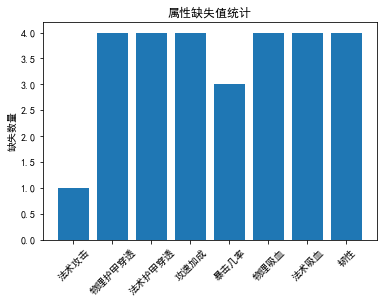

序号
16      嫦娥
28     公孙离
29      弈星
34    百里守约
Name: 英雄名字, dtype: object


In [79]:
data_null = data.isnull().sum()
data_null = data_null[data_null != 0]  # 删除缺失值数量为0的列
fig, ax = plt.subplots()
ax.bar(data_null.index, data_null.values)
ax.set_xticklabels(data_null.index, rotation=45)
ax.set_ylabel('缺失数量')
ax.set_title('属性缺失值统计')
plt.show()

null_cols = data.columns[data.isnull().any()]  # 找出含有缺失值的列
for col in null_cols:
    null_rows = data[data[col].isnull()]# 找出该列中缺失值所在的行
print(null_rows['英雄名字'])

Text(0.5, 1.0, '生存能力')

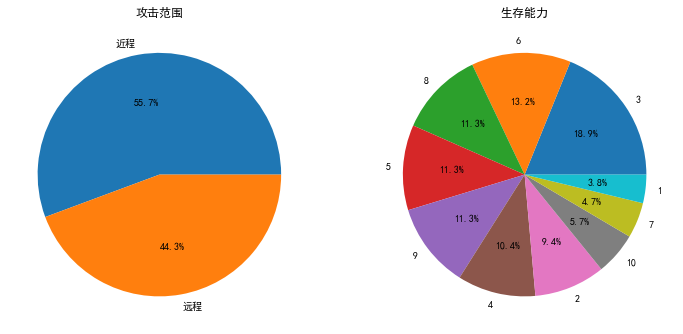

In [49]:
data_Range = data.loc[:,'攻击范围']
range_val = data_Range.value_counts()
data_Ability = data.loc[:,'生存能力']
ability_val = data_Ability.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 14))

axes[0].pie(range_val.values, labels = range_val.index, autopct='%.1f%%')
axes[0].set_title('攻击范围')
axes[1].pie(ability_val.values, labels = ability_val.index, autopct='%.1f%%')
axes[1].set_title('生存能力')

<AxesSubplot:>

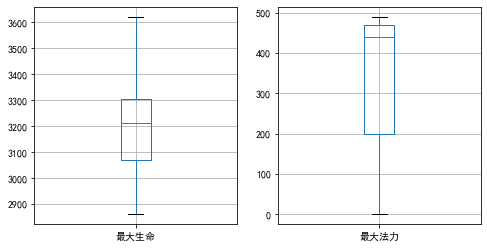

In [69]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
data.boxplot(column=['最大生命'],ax=axes[0],showfliers=False)
data.boxplot(column=['最大法力'],ax=axes[1],showfliers=False)